from https://www.kaggle.com/code/datguyprasham/vgg16-70-30

this notebook appears to be test/train splitting the training set.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import keras
import tensorflow as tf
import os
import glob


from tensorflow.keras.applications.vgg16 import VGG16
from numpy import load
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras import backend
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

from pprint import pprint


from pathlib import Path

2023-11-06 12:26:02.192907: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-06 12:26:02.194656: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-06 12:26:02.214476: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-06 12:26:02.214491: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-06 12:26:02.214506: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
# image_dir = Path("../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train")
image_dir = Path("/s/bach/a/class/cs435/cs435a/CS435_Plant_Data/train")

image_dir

PosixPath('/s/bach/a/class/cs435/cs435a/CS435_Plant_Data/train')

In [3]:
filepaths = list(image_dir.glob(r'**/*.JPG'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

images = pd.concat([filepaths, labels], axis=1)

In [4]:
images

,Filepath,Label
0,/s/bach/a/class/cs435/cs435a/CS435_Plant_Data/...,Apple___Apple_scab
1,/s/bach/a/class/cs435/cs435a/CS435_Plant_Data/...,Apple___Apple_scab
2,/s/bach/a/class/cs435/cs435a/CS435_Plant_Data/...,Apple___Apple_scab
3,/s/bach/a/class/cs435/cs435a/CS435_Plant_Data/...,Apple___Apple_scab
4,/s/bach/a/class/cs435/cs435a/CS435_Plant_Data/...,Apple___Apple_scab
...,...,...
67843,/s/bach/a/class/cs435/cs435a/CS435_Plant_Data/...,"Pepper,_bell___healthy"
67844,/s/bach/a/class/cs435/cs435a/CS435_Plant_Data/...,"Pepper,_bell___healthy"
67845,/s/bach/a/class/cs435/cs435a/CS435_Plant_Data/...,"Pepper,_bell___healthy"
67846,/s/bach/a/class/cs435/cs435a/CS435_Plant_Data/...,"Pepper,_bell___healthy"


In [5]:
train_df, test_df = train_test_split(images, train_size=0.7, shuffle=True, random_state=1)

In [6]:
# local_weights_file = '../input/inceptionv3-imagenet-weights/inception_v3_weights.h5' #what is this

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1/255)

In [8]:
batch_size = 32

In [9]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    batch_size=batch_size,
    class_mode='categorical',
    target_size=(150, 150),
    color_mode="rgb",
    shuffle=True,
    subset='training'
)

validation_generator =  train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    batch_size=batch_size,
    class_mode='categorical',
    target_size=(150, 150),
    color_mode="rgb",
    shuffle=True,
    subset='validation'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    batch_size=batch_size,
    class_mode='categorical',
    target_size=(150, 150),
    color_mode="rgb",
    shuffle=False
)

Found 37995 validated image filenames belonging to 38 classes.
Found 9498 validated image filenames belonging to 38 classes.
Found 20355 validated image filenames belonging to 38 classes.


In [10]:
class_dict = train_generator.class_indices
pprint(class_dict)

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [11]:
train_num = train_generator.samples
valid_num = validation_generator.samples

In [12]:
# # Creating Instence of pre-trained model from Keras Application
# vgg_model = VGG16(input_shape=(150, 150, 3),
#                                 include_top=False,
#                                 weights=None)

# inception_model.load_weights(local_weights_file)

base_model=tf.keras.applications.VGG16(weights="imagenet",include_top=False,input_shape=(150,150,3))
base_model.trainable=False

In [13]:
vgg_model=keras.models.Sequential()
vgg_model.add(base_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(4096,activation='relu'))
vgg_model.add(Dense(4096,activation='relu'))
vgg_model.add(Dense(38,activation='softmax'))
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 4096)              33558528  
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dense_2 (Dense)             (None, 38)                155686    
                                                                 
Total params: 65210214 (248.76 MB)
Trainable params: 50495526 (192.63 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [14]:
vgg_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
import scipy
history = vgg_model.fit(
    train_generator,
    steps_per_epoch=train_num//batch_size,
    validation_data=validation_generator,
    epochs=1,
    validation_steps=valid_num//batch_size,
)

1187/1187 [==============================] - 807s 680ms/step - loss: 1.1302 - accuracy: 0.6540 - val_loss: 0.7668 - val_accuracy: 0.7504


In [ ]:
# filepath="Mymodel.h5"
# vgg_model.save(filepath)

In [16]:
from sklearn.metrics import accuracy_score

test_generator.reset()
pred = vgg_model.predict_generator(
    test_generator,
    verbose=1
)

predicted_class_indices = np.argmax(pred, axis=1)
true_class_indices = test_generator.classes

test_acc = accuracy_score(true_class_indices, predicted_class_indices)
print('Test accuracy:', test_acc)

/tmp/ipykernel_364835/3650955483.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = vgg_model.predict_generator(


637/637 [==============================] - 285s 447ms/step
Test accuracy: 0.8060427413411938


In [17]:
from sklearn.metrics import classification_report

true_labels = test_generator.labels

report = classification_report(true_labels, predicted_class_indices, target_names=test_generator.class_indices)
print(report)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.91      0.42      0.57       638
                                 Apple___Black_rot       0.84      0.91      0.87       601
                          Apple___Cedar_apple_rust       0.61      0.89      0.73       536
                                   Apple___healthy       0.71      0.94      0.81       627
                               Blueberry___healthy       0.81      0.93      0.87       567
          Cherry_(including_sour)___Powdery_mildew       0.97      0.88      0.93       492
                 Cherry_(including_sour)___healthy       0.90      0.96      0.93       539
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.87      0.88      0.88       420
                       Corn_(maize)___Common_rust_       0.99      0.94      0.96       569
               Corn_(maize)___Northern_Leaf_Blight       0.90      0.84      0.

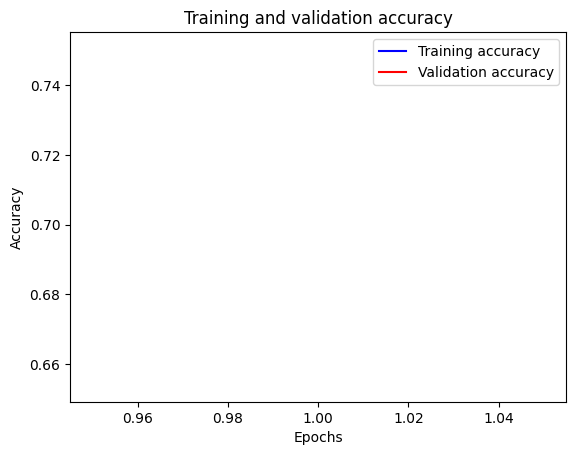

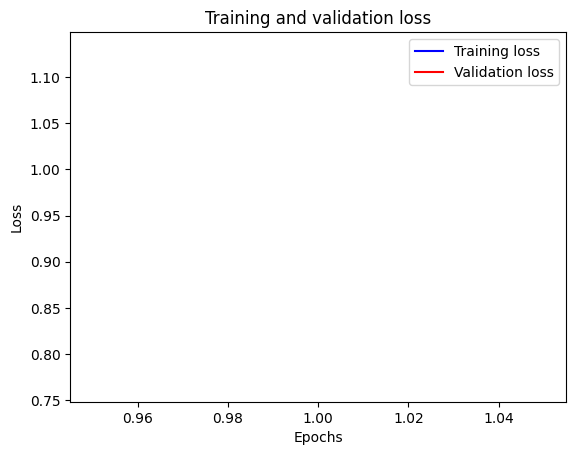

In [18]:
# Plotting accuracy vs epochs
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss vs epochs
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
data = {'acc': acc, 'loss': loss, 'val_acc': val_acc, 'val_loss': val_loss}
df = pd.DataFrame(data)

df.to_csv('InceptionV3-80_20.csv', index=False)

In [20]:
avg_acc = sum(df['acc']) / len(df['acc'])
avg_val_acc = sum(df['val_acc']) / len(df['val_acc'])

avg_loss = sum(df['loss']) / len(df['loss'])
avg_val_loss = sum(df['val_loss']) / len(df['val_loss'])

print('Mean acc: ', avg_acc)
print('Mean val acc: ', avg_val_acc)

print('Mean loss: ', avg_loss)
print('Mean val loss: ', avg_val_loss)

Mean acc:  0.6539788842201233
Mean val acc:  0.7504222989082336
Mean loss:  1.1301649808883667
Mean val loss:  0.7668405175209045
